In [1]:
!nvidia-smi

Sun May 28 15:25:42 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.41.03              Driver Version: 530.41.03    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB           On | 00000000:41:00.0 Off |                    0 |
| N/A   33C    P0               53W / 400W|      0MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
# Pip install method (recommended)
!pip install ultralytics==8.0.20
!pip install roboflow --quiet

import os
import glob

from credentials import YOUR_API_KEY
from IPython import display
from IPython.display import display, Image, clear_output
import ultralytics
from ultralytics import YOLO
from roboflow import Roboflow

import torch
torch.cuda.empty_cache()

ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.9 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-40GB, 40377MiB)
Setup complete ✅ (128 CPUs, 503.8 GB RAM, 40.3/58.8 GB disk)


In [3]:
# Setting Home variable to work easier with the file paths later.
HOME = os.getcwd()
print(HOME)

/home/hpc/iwb3/iwb3006h/workspace/TRACO-HexBug


In [4]:
# Removing already existing `datasets` directory
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/home/hpc/iwb3/iwb3006h/workspace/TRACO-HexBug/datasets


In [10]:
rf = Roboflow(api_key=YOUR_API_KEY)
project = rf.workspace("hexbugs").project("bugbusters")
dataset = project.version(19).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Extracting Dataset Version Zip to BugBusters-19 in yolov5pytorch:: 100%|██████████| 7502/7502 [00:28<00:00, 264.06it/s]


In [13]:
%cd {HOME}
# using the already implemented `yolo` package to perform a training task.
# It'll download the `Yolov8s.pt` mdoel for reference and use its already trained weights for transfer learning.
!~/.local/bin/yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 plots=True

/home/hpc/iwb3/iwb3006h/workspace/TRACO-HexBug
Ultralytics YOLOv8.0.20 🚀 Python-3.10.9 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-40GB, 40377MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/home/hpc/iwb3/iwb3006h/workspace/TRACO-HexBug/datasets/BugBusters-19/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        190        247      0.987       0.98      0.994      0.715
                HexBug        190        247      0.987       0.98      0.994      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      9/100      4.77G      1.002     0.5342      1.028          3        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        190        247      0.994      0.996      0.994      0.738
                HexBug        190        247      0.994      0.996      0.994      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     10/100      4.77G     0.9729     0.5155      1.025          4        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        190        247      0.992      0.999      0.995    


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     28/100      4.77G      0.792     0.4066     0.9507          8        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        190        247      0.996          1      0.994      0.771
                HexBug        190        247      0.996          1      0.994      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     29/100      4.77G     0.7914     0.4063     0.9473          3        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        190        247      0.996          1      0.995      0.775
                HexBug        190        247      0.996          1      0.995      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     30/100      4.77G     0.7869     0.4038     0.9436          7        640: 1
  

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        190        247          1          1      0.995      0.782
                HexBug        190        247          1          1      0.995      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     48/100      4.77G      0.694     0.3533     0.9135         11        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        190        247      0.999          1      0.995      0.782
                HexBug        190        247      0.999          1      0.995      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     49/100      4.77G     0.6735     0.3444     0.9046          5        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        190        247          1      0.996      0.995    


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     67/100      4.77G     0.6059     0.3131     0.8818          7        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        190        247      0.999          1      0.995      0.785
                HexBug        190        247      0.999          1      0.995      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     68/100      4.77G     0.6015     0.3012     0.8833          5        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        190        247      0.999          1      0.995      0.789
                HexBug        190        247      0.999          1      0.995      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     69/100      4.77G     0.6005      0.302     0.8814          5        640: 1
  

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        190        247          1          1      0.995      0.798
                HexBug        190        247          1          1      0.995      0.798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     87/100      4.77G     0.5298     0.2638     0.8642          5        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        190        247          1          1      0.995      0.797
                HexBug        190        247          1          1      0.995      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     88/100      4.77G     0.5181      0.261     0.8578          8        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        190        247          1          1      0.995    

In [16]:
!ls {HOME}/runs/detect/train2/

F1_curve.png				       train_batch18990.jpg
PR_curve.png				       train_batch18991.jpg
P_curve.png				       train_batch18992.jpg
R_curve.png				       train_batch2.jpg
args.yaml				       val_batch0_labels.jpg
confusion_matrix.png			       val_batch0_pred.jpg
events.out.tfevents.1685281147.tg093.355175.0  val_batch1_labels.jpg
results.csv				       val_batch1_pred.jpg
results.png				       val_batch2_labels.jpg
train_batch0.jpg			       val_batch2_pred.jpg
train_batch1.jpg			       weights


/home/hpc/iwb3/iwb3006h/workspace/TRACO-HexBug


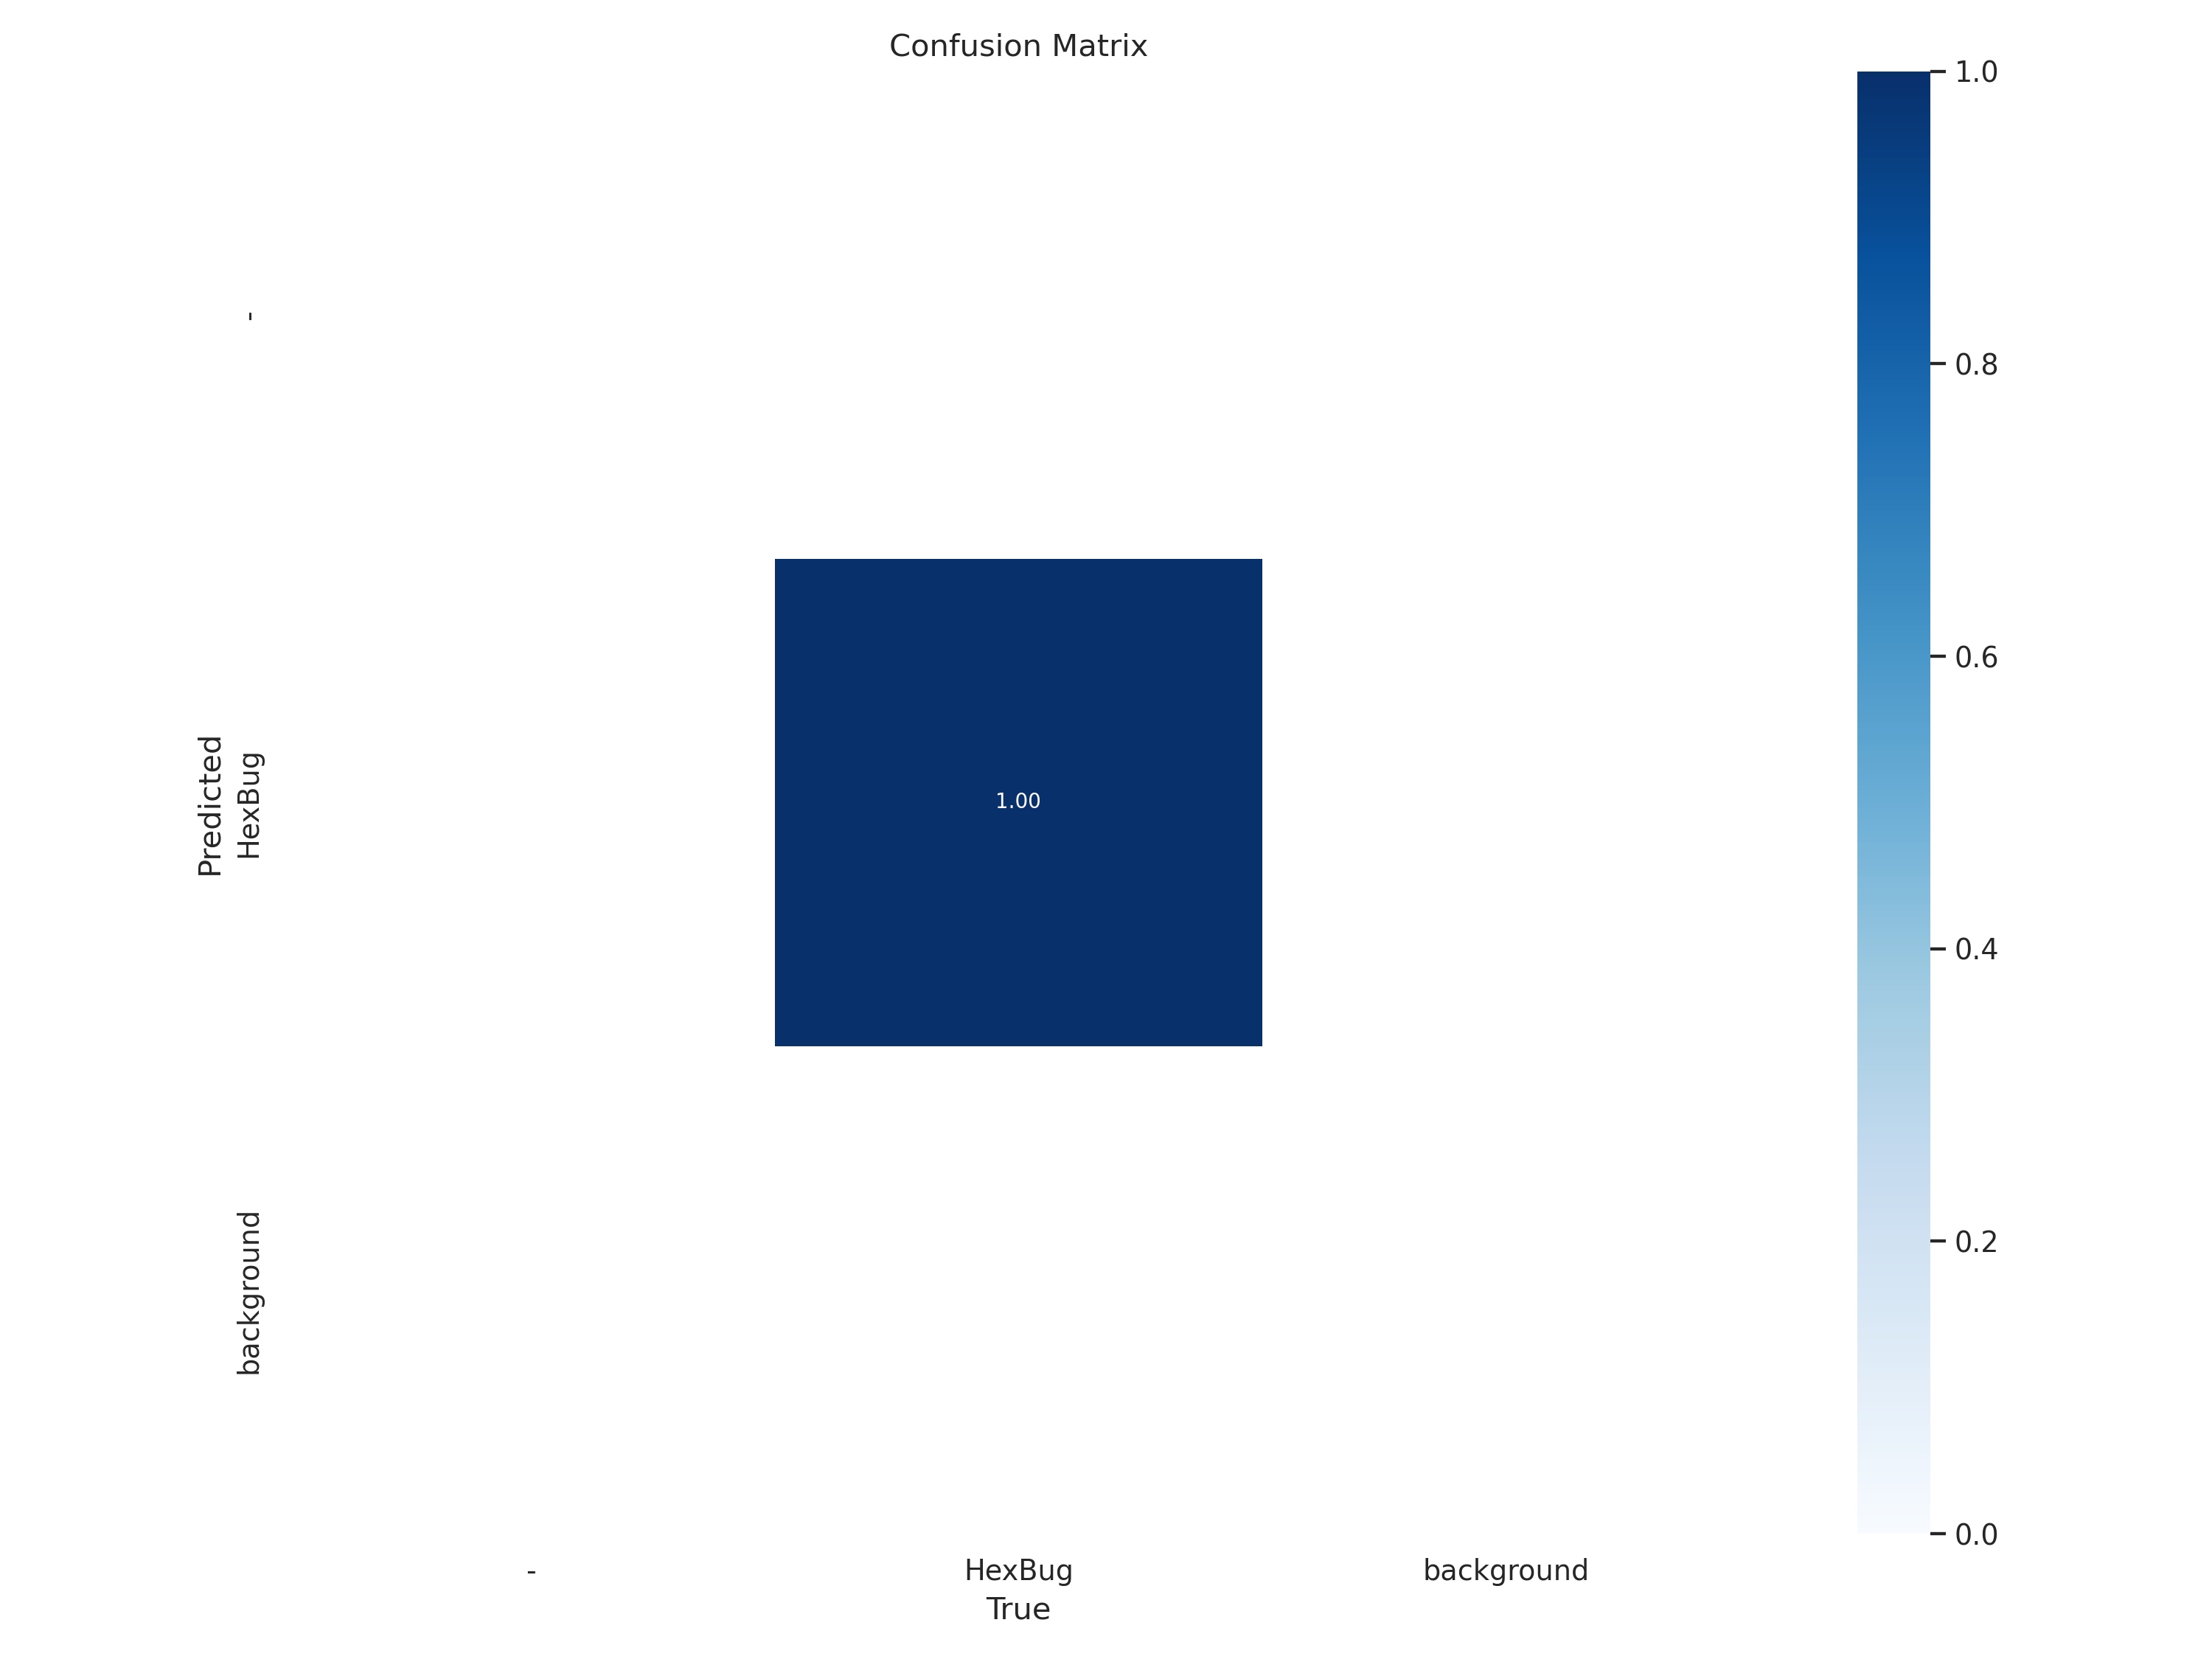

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/home/hpc/iwb3/iwb3006h/workspace/TRACO-HexBug


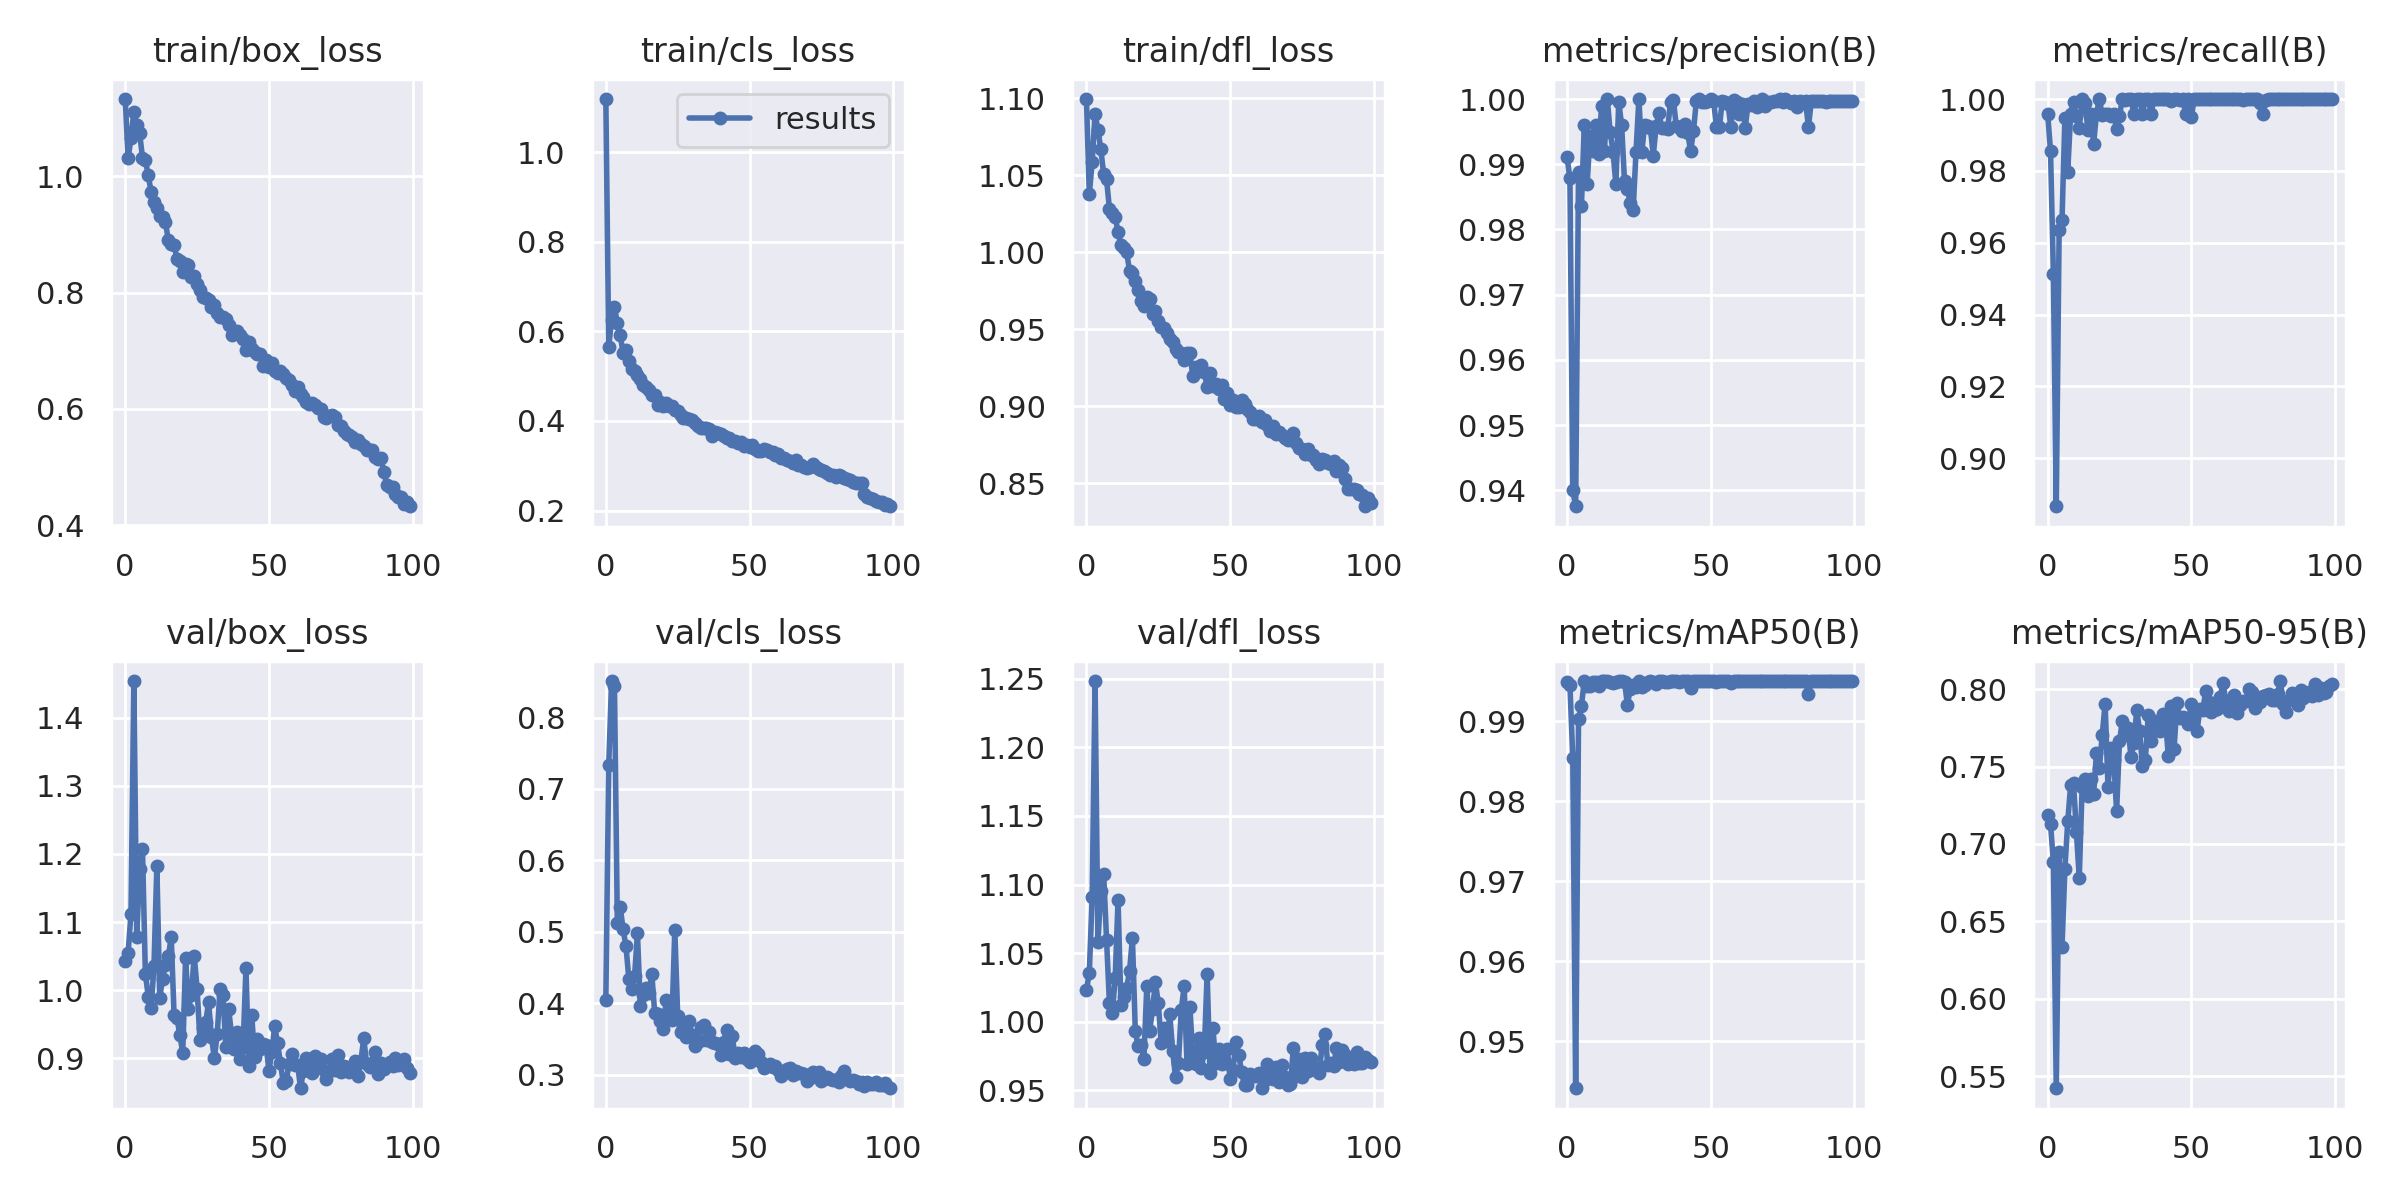

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/home/hpc/iwb3/iwb3006h/workspace/TRACO-HexBug


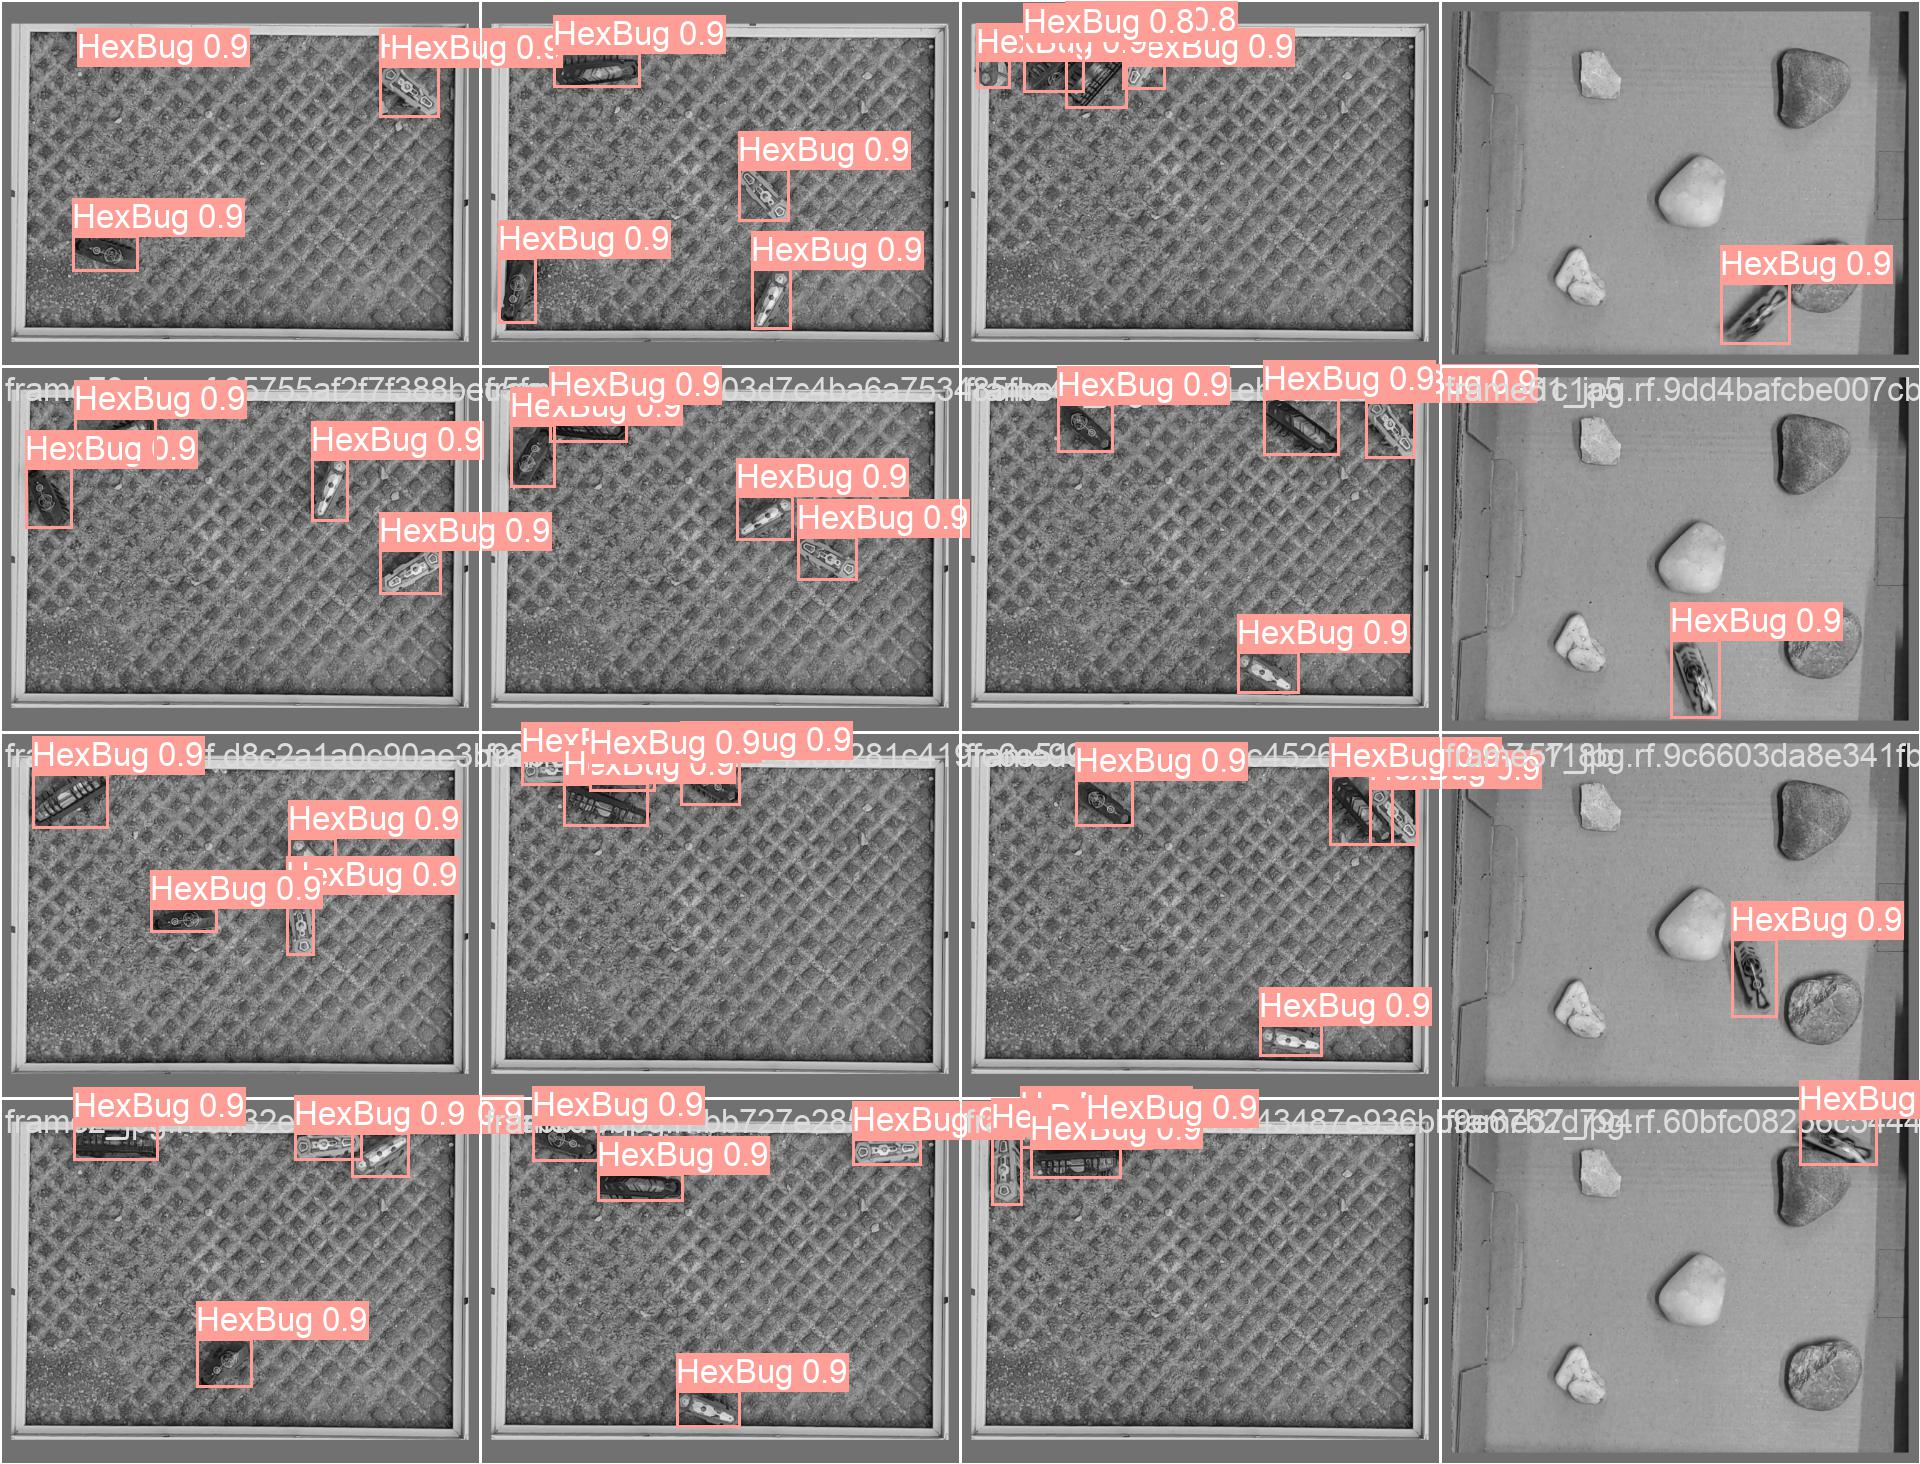

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [24]:
%cd {HOME}

!~/.local/bin/yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/home/hpc/iwb3/iwb3006h/workspace/TRACO-HexBug
Ultralytics YOLOv8.0.20 🚀 Python-3.10.9 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-40GB, 40377MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /home/hpc/iwb3/iwb3006h/workspace/TRACO-HexBug/datasets/BugBusters
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        190        247          1          1      0.995      0.807
                HexBug        190        247          1          1      0.995      0.807
Speed: 0.6ms pre-process, 1.4ms inference, 0.0ms loss, 1.5ms post-process per image


In [ ]:
%cd {HOME}
!~/.local/bin/yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/home/hpc/iwb3/iwb3006h/workspace/TRACO-HexBug
Ultralytics YOLOv8.0.20 🚀 Python-3.10.9 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-40GB, 40377MiB)


In [ ]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")